# Titanic Tutorial

## 概要：
- 运行时间比较长的训练，还是应该弄个TensorBoard，方便监控结果，免得每次都需要用鼠标手动托页面查看最新的运行结果。
- 模型为全链接神经网络和统计学习方法。

## Result:


Reference: 
1. https://www.kaggle.com/c/titanic#tutorials
2. https://www.kaggle.com/sinakhorami/titanic-best-working-classifier
3. https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python/notebook


## 1. Preprocess

### Import pkgs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

%matplotlib inline

### Import original data as DataFrame

In [2]:
data_train = pd.read_csv('./input/train.csv')
data_test = pd.read_csv('./input/test.csv')

display(data_train.head(2))
display(data_test.head(2))
data_train.loc[2, 'Ticket']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


'STON/O2. 3101282'

### Show columns of dataframe

In [3]:
data_train_original_col = data_train.columns
data_test_original_col = data_test.columns
print(data_train_original_col)
print(data_test_original_col)
# data_train0 = data_train.drop(data_train_original_col, axis = 1)
# data_test0  = data_test.drop(data_test_original_col, axis = 1)
# display(data_train0.head(2))
# display(data_test0.head(2))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### Preprocess features

In [4]:
full_data = [data_train, data_test]

In [5]:
# Pclass
for dataset in full_data:
    temp = dataset[dataset['Pclass'].isnull()]
    if len(temp) == 0:
        print('Do not have null value!')
    else:
        temp.head(2)
        
for dataset in full_data:
    dataset['a_Pclass'] = dataset['Pclass']
#     display(dataset.head())

Do not have null value!
Do not have null value!


In [6]:
# Name
for dataset in full_data:
    dataset['a_Name_Length'] = dataset['Name'].apply(len)
#     display(dataset.head(2))

In [7]:
# Sex
for dataset in full_data:
    dataset['a_Sex'] = dataset['Sex'].map({'female': 0, 'male': 1}).astype(int)
#     display(dataset.head(2))

In [8]:
# Age
for dataset in full_data:
    dataset['a_Age'] = dataset['Age'].fillna(-1)
    dataset['a_Have_Age'] = dataset['Age'].isnull().map({True: 0, False: 1}).astype(int)
#     display(dataset[dataset['Age'].isnull()].head(2))
#     display(dataset.head(2))

In [9]:
# SibSp and Parch
for dataset in full_data:
    dataset['a_FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['a_IsAlone'] = dataset['a_FamilySize'].apply(lambda x: 1 if x<=1 else 0)
#     display(dataset.head(2))

In [10]:
# Ticket(Very one have a ticket)
for dataset in full_data:
    dataset['a_Have_Ticket'] = dataset['Ticket'].isnull().map({True: 0, False: 1}).astype(int)
#     display(dataset[dataset['Ticket'].isnull()].head(2))
#     display(dataset.head(2))

In [11]:
# Fare
for dataset in full_data:
    dataset['a_Fare'] = dataset['Fare'].fillna(-1)
    dataset['a_Have_Fare'] = dataset['Fare'].isnull().map({True: 0, False: 1}).astype(int)
#     display(dataset[dataset['Fare'].isnull()].head(2))
#     display(dataset.head(2))

In [12]:
# Cabin
for dataset in full_data:
    dataset['a_Have_Cabin'] = dataset['Cabin'].isnull().map({True: 0, False: 1}).astype(int)
#     display(dataset[dataset['Cabin'].isnull()].head(2))
#     display(dataset.head(2))

In [13]:
# Embarked
for dataset in full_data:
#     dataset['Embarked'] = dataset['Embarked'].fillna('N')
    dataset['a_Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2, None: 3} ).astype(int)
    dataset['a_Have_Embarked'] = dataset['Embarked'].isnull().map({True: 0, False: 1}).astype(int)
#     display(dataset[dataset['Embarked'].isnull()].head(2))
#     display(dataset.head(2))

Name words segmentation and one-hote

In [14]:
# Name words segmentation
import re
name_words = []

# Inorder to allign columns of data_train and data_test, only data_train to fetch word
for name in data_train['Name']:
#     print(name)
    words = re.findall(r"[\w']+", name)
#     print(len(words))
#     print(words)
    for w in words:
        if w not in name_words:
            name_words.append(w)
# print(len(name_words))
name_words.sort()
# print(name_words)

In [15]:
# Add columns
for dataset in full_data:
    for w in name_words:
        col_name = 'a_Name_' + w
        dataset[col_name] = 0
    dataset.head(1)

In [16]:
# Name words one-hote
for dataset in full_data:
    for i, row in dataset.iterrows():
    #     print(row['Name'])
        words = re.findall(r"[\w']+", row['Name'])
        for w in words:
            if w in name_words:
                col_name = 'a_Name_' + w
                dataset.loc[i, col_name] = 1
#     display(dataset[dataset['a_Name_Braund'] == 1])

Cabin segmentation and one-hote

In [17]:
# Get cabin segmentation words
import re
cabin_words = []

# Inorder to allign columns of data_train and data_test, only data_train to fetch number
for c in data_train['Cabin']:
#     print(c)
    if c is not np.nan:
        word = re.findall(r"[a-zA-Z]", c)
#         print(words[0])
        cabin_words.append(word[0])
print(len(cabin_words))
cabin_words.sort()
print(np.unique(cabin_words))
cabin_words_unique = list(np.unique(cabin_words))

204
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T']


In [18]:
def get_cabin_word(cabin):
    if cabin is not np.nan:
        word = re.findall(r"[a-zA-Z]", cabin)
        if word:
            return cabin_words_unique.index(word[0])
    return -1

for dataset in full_data:
    dataset['a_Cabin_Word'] = dataset['Cabin'].apply(get_cabin_word)
    # dataset['a_Cabin_Word'].head(100)

In [19]:
def get_cabin_number(cabin):
    if cabin is not np.nan:
        word = re.findall(r"[0-9]+", cabin)
        if word:
            return int(word[0])
    return -1

for dataset in full_data:
    dataset['a_Cabin_Number'] = dataset['Cabin'].apply(get_cabin_number)
    # dataset['a_Cabin_Number'].head(100)

In [20]:
# Clean data
# Reference: 
#    1. https://www.kaggle.com/sinakhorami/titanic-best-working-classifier
#    2. https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python/notebook
# full_data = [data_train, data_test]
# for dataset in full_data:
#     dataset['a_Name_length'] = dataset['Name'].apply(len)
#     #dataset['Sex'] = (dataset['Sex']=='male').astype(int)
#     dataset['a_Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
#     dataset['a_Age'] = dataset['Age'].fillna(0)
#     dataset['a_Age_IsNull'] = dataset['Age'].isnull()
#     dataset['a_FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
#     dataset['a_IsAlone'] = dataset['a_FamilySize'].apply(lambda x: 1 if x<=1 else 0)
#     dataset['a_Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())
#     #dataset['Has_Cabin'] = dataset['Cabin'].apply(lambda x: 1 if type(x) == str else 0) # same as below
#     dataset['a_Has_Cabin'] = dataset['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
#     dataset['a_Has_Embarked'] = dataset['Embarked'].isnull()
#     dataset['Embarked'] = dataset['Embarked'].fillna('N')
#     dataset['a_Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2, 'N': 3} ).astype(int)
#     dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
# display(data_train.head(2))
# display(data_test.head(2))

In [21]:
survived = data_train['Survived']
data_train0 = data_train.drop(data_train_original_col, axis = 1)
data_test0  = data_test.drop(data_test_original_col, axis = 1)
display(data_train0.head(2))
display(data_test0.head(2))

features = data_train0
display(features.head(2))

,a_Pclass,a_Name_Length,a_Sex,a_Age,a_Have_Age,a_FamilySize,a_IsAlone,a_Have_Ticket,a_Fare,a_Have_Fare,...,a_Name_de,a_Name_del,a_Name_der,a_Name_hoef,a_Name_of,a_Name_the,a_Name_van,a_Name_y,a_Cabin_Word,a_Cabin_Number
0,3,23,1,22.0,1,2,0,1,7.2500,1,...,0,0,0,0,0,0,0,0,-1,-1
1,1,51,0,38.0,1,2,0,1,71.2833,1,...,0,0,0,0,0,0,0,0,2,85


,a_Pclass,a_Name_Length,a_Sex,a_Age,a_Have_Age,a_FamilySize,a_IsAlone,a_Have_Ticket,a_Fare,a_Have_Fare,...,a_Name_de,a_Name_del,a_Name_der,a_Name_hoef,a_Name_of,a_Name_the,a_Name_van,a_Name_y,a_Cabin_Word,a_Cabin_Number
0,3,16,1,34.5,1,1,1,1,7.8292,1,...,0,0,0,0,0,0,0,0,-1,-1
1,3,32,0,47.0,1,2,0,1,7.0000,1,...,0,0,0,0,0,0,0,0,-1,-1


,a_Pclass,a_Name_Length,a_Sex,a_Age,a_Have_Age,a_FamilySize,a_IsAlone,a_Have_Ticket,a_Fare,a_Have_Fare,...,a_Name_de,a_Name_del,a_Name_der,a_Name_hoef,a_Name_of,a_Name_the,a_Name_van,a_Name_y,a_Cabin_Word,a_Cabin_Number
0,3,23,1,22.0,1,2,0,1,7.2500,1,...,0,0,0,0,0,0,0,0,-1,-1
1,1,51,0,38.0,1,2,0,1,71.2833,1,...,0,0,0,0,0,0,0,0,2,85


Check and confirm all columns is proccessed

In [22]:
for col in features.columns:
    if not col.startswith('a_'):
        print(col)

In [23]:
# Shuffle and split the train_data into train, crossvalidation and testing subsets
x_train, x_val, y_train, y_val = train_test_split(features, survived, test_size=0.2, random_state=2017)

In [24]:
# Show distribute of abave data sets
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)
display(x_train.head(2))
display(y_train.head(2))

(712, 1544)
(179, 1544)
(712,)
(179,)


,a_Pclass,a_Name_Length,a_Sex,a_Age,a_Have_Age,a_FamilySize,a_IsAlone,a_Have_Ticket,a_Fare,a_Have_Fare,...,a_Name_de,a_Name_del,a_Name_der,a_Name_hoef,a_Name_of,a_Name_the,a_Name_van,a_Name_y,a_Cabin_Word,a_Cabin_Number
304,3,33,1,-1.0,0,1,1,1,8.05,1,...,0,0,0,0,0,0,0,0,-1,-1
149,2,33,1,42.0,1,1,1,1,13.00,1,...,0,0,0,0,0,0,0,0,-1,-1


304    0
149    0
Name: Survived, dtype: int64

## 2. Build model

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def my_GridSearchCV(model, parameters):
    if parameters:
        clf = GridSearchCV(model, parameters)
    else:
        clf = model
    clf.fit(x_train, y_train)
    return clf

def ny_train(models):
    clfs = {}
    for key, value in models.items():
        print('start ' + key)
        clf = my_GridSearchCV(value['model'], value['param'])
        clfs[key] = clf
    return clfs

def my_predict(clfs, x_val=x_val, y_val=y_val):
    for key, value in clfs.items():
        print(key, end=':  ')
        y_pred = value.predict(x_val)
        print(accuracy_score(y_val, y_pred))

In [26]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

models = {}
models = {
#     'SVC': {
#         'model': SVC(),
#         'param': {'kernel':('linear', 'rbf'), 'C':[1, 5, 10]}
#     },
    'GaussianNB':{
        'model': GaussianNB(),
        'param': {}
    },
    'AdaBoostClassifier':{
        'model': AdaBoostClassifier(),
        'param': {}
    },
    'RandomForestClassifier':{
        'model': RandomForestClassifier(),
        'param': {}
    }
}

clfs = ny_train(models)
my_predict(clfs)

start GaussianNB
start AdaBoostClassifier
start RandomForestClassifier
GaussianNB:  0.446927374302
AdaBoostClassifier:  0.854748603352
RandomForestClassifier:  0.843575418994


### Neuron network

In [27]:
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, TensorBoard

Using TensorFlow backend.


In [28]:
# Initialising the ANN
model = Sequential()

# layers
model.add(Dense(units = 2048, activation = 'relu', input_dim = 1544))
model.add(Dropout(0.5))
model.add(Dense(units = 2048, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 2048, activation = 'relu'))
model.add(Dropout(0.5))
# model.add(Dense(units = 2048, activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(Dense(units = 2048, activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(Dense(units = 2048, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = Adam(lr=1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])


x_val = x_val.as_matrix()
y_val = y_val.as_matrix()

hist = model.fit(x_train.as_matrix(), y_train.as_matrix(), 
                 batch_size = 8, 
                 verbose=1,
                 epochs = 200,
                 validation_data=(x_val, y_val))

Train on 712 samples, validate on 179 samples
Epoch 1/200
712/712 [==============================] - 14s - loss: 1.2365 - acc: 0.5660 - val_loss: 0.7661 - val_acc: 0.6257
Epoch 2/200
712/712 [==============================] - 12s - loss: 1.1298 - acc: 0.5815 - val_loss: 0.7586 - val_acc: 0.5754
Epoch 3/200
712/712 [==============================] - 12s - loss: 1.1037 - acc: 0.6208 - val_loss: 0.9004 - val_acc: 0.5419
Epoch 4/200
712/712 [==============================] - 12s - loss: 1.1365 - acc: 0.5913 - val_loss: 1.0834 - val_acc: 0.3575
Epoch 5/200
712/712 [==============================] - 12s - loss: 1.0516 - acc: 0.6320 - val_loss: 0.6966 - val_acc: 0.6648
Epoch 6/200
712/712 [==============================] - 12s - loss: 0.8897 - acc: 0.6531 - val_loss: 0.6795 - val_acc: 0.7039
Epoch 7/200
712/712 [==============================] - 12s - loss: 0.9832 - acc: 0.6250 - val_loss: 0.6537 - val_acc: 0.7318
Epoch 8/200
712/712 [==============================] - 12s - loss: 0.9075 - acc

712/712 [==============================] - 12s - loss: 0.0227 - acc: 0.9916 - val_loss: 1.0384 - val_acc: 0.8380
Epoch 130/200
712/712 [==============================] - 12s - loss: 0.0415 - acc: 0.9831 - val_loss: 1.1360 - val_acc: 0.7989
Epoch 131/200
712/712 [==============================] - 12s - loss: 0.0391 - acc: 0.9860 - val_loss: 1.1304 - val_acc: 0.8101
Epoch 132/200
712/712 [==============================] - 12s - loss: 0.0317 - acc: 0.9888 - val_loss: 1.0395 - val_acc: 0.8380
Epoch 133/200
712/712 [==============================] - 12s - loss: 0.0186 - acc: 0.9930 - val_loss: 1.0873 - val_acc: 0.8212
Epoch 134/200
712/712 [==============================] - 12s - loss: 0.0264 - acc: 0.9888 - val_loss: 1.1384 - val_acc: 0.8212
Epoch 135/200
712/712 [==============================] - 12s - loss: 0.0471 - acc: 0.9860 - val_loss: 1.1147 - val_acc: 0.8268
Epoch 136/200
712/712 [==============================] - 12s - loss: 0.0454 - acc: 0.9860 - val_loss: 1.1764 - val_acc: 0.810

In [29]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=1)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

179/179 [==============================] - 0s     
Final loss: 1.3308, final accuracy: 0.8268


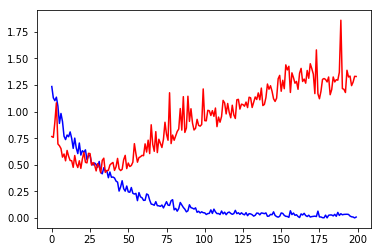

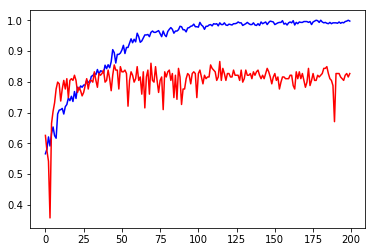

In [30]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

### Predict and Export pred.csv file

In [31]:
train_cols = data_train.columns
for col in data_test0.columns:
    if col not in train_cols:
        print(col)

In [32]:
import time
import os

project_name = 'Titanic'
step_name = 'Predict'
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
final_acc_str = str(int(final_acc*10000))
run_name = project_name + '_' + step_name + '_' + time_str + '_' + final_acc_str
print(run_name)
cwd = os.getcwd()
pred_file = os.path.join(cwd, 'output', run_name + '.csv')
print(pred_file)

Titanic_Predict_20171027_161026_8268
D:\Kaggle\Titanic_Machine_Learning_From_Disaster\output\Titanic_Predict_20171027_161026_8268.csv


In [33]:
display(data_test0.head(2))
y_data_pred = model.predict(data_test0.as_matrix())
print(y_data_pred.shape)
y_data_pred = np.squeeze(y_data_pred)
print(y_data_pred.shape)
y_data_pred = (y_data_pred > 0.5).astype(int)
print(y_data_pred)

print(data_test['PassengerId'].shape)
passenger_id = data_test['PassengerId']
output = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': y_data_pred })

output.to_csv(pred_file , index = False)

,a_Pclass,a_Name_Length,a_Sex,a_Age,a_Have_Age,a_FamilySize,a_IsAlone,a_Have_Ticket,a_Fare,a_Have_Fare,...,a_Name_de,a_Name_del,a_Name_der,a_Name_hoef,a_Name_of,a_Name_the,a_Name_van,a_Name_y,a_Cabin_Word,a_Cabin_Number
0,3,16,1,34.5,1,1,1,1,7.8292,1,...,0,0,0,0,0,0,0,0,-1,-1
1,3,32,0,47.0,1,2,0,1,7.0000,1,...,0,0,0,0,0,0,0,0,-1,-1


(418, 1)
(418,)
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1
 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1
 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1
 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0
 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 0 1 1 1 1 0 0 1 0 0 1]
(418,)


In [34]:
# display(data_test0.head(2))
# y_data_pred = clfs['RandomForestClassifier'].predict(data_test0.as_matrix())
# print(y_data_pred.shape)
# y_data_pred = np.squeeze(y_data_pred)
# print(y_data_pred.shape)
# print(data_test['PassengerId'].shape)
# passenger_id = data_test['PassengerId']
# output = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': y_data_pred })

# output.to_csv(pred_file , index = False)

In [36]:
print(run_name)
print('Done!')

Titanic_Predict_20171027_161026_8268
Done!
